In [31]:
from __future__ import print_function

In [32]:
import pyaudio

In [33]:
import pydub

In [34]:
import wave

In [35]:
import numpy

In [36]:
import time

In [37]:
import IPython.display as ipd

In [38]:
import numpy as np

In [39]:
from six.moves import xrange

In [40]:
import pyaudio
pa = pyaudio.PyAudio()
pa.get_default_input_device_info()

{'index': 12,
 'structVersion': 2,
 'name': 'default',
 'hostApi': 0,
 'maxInputChannels': 32,
 'maxOutputChannels': 32,
 'defaultLowInputLatency': 0.008707482993197279,
 'defaultLowOutputLatency': 0.008707482993197279,
 'defaultHighInputLatency': 0.034829931972789115,
 'defaultHighOutputLatency': 0.034829931972789115,
 'defaultSampleRate': 44100.0}

In [41]:
import sys
from array import array

In [42]:
import os
os.getcwd()

'/home/crl/Documents/cms'

In [43]:
import numpy as np
import os
from scipy import signal
import matplotlib.pyplot as plt
import scipy
import wave
import sys
from array import array
import scipy.signal as sg

#
format_ = pyaudio.paInt16
channels = 1
frame_rate = 16000
rate = 16000
frame_per_buffer_size = 1024
chunk_size = 1024
noise_th = 2000
threshold = 13000
silence_limit = 25
silent_limit_control = 12
def is_silent(sound, noise_th = 500):
    
    return max(sound) < noise_th


p = pyaudio.PyAudio()

data = []
sample_width = None
print('n_silence: ', silent_limit_control)

#print('current n_silence: ', silent_limit_control)
stream = p.open(format = format_, 
                channels = channels, 
                rate = rate,
                input = True, 
                output = True,
                frames_per_buffer = chunk_size)

num_silent = 0
sound_data_started = False

r = array('h')
print('PLese Speak... ')
while 1:
    # little endian, signed short
    sound_data = array('h', stream.read(chunk_size))
    #print(max(sound_data))
    
    r.extend(sound_data)

    silent = is_silent(sound_data, threshold)

    if silent and sound_data_started:
        num_silent += 1
    elif not silent and not sound_data_started:
        sound_data_started = True

    if sound_data_started and num_silent > silent_limit_control:
        break

sample_width = (p.get_sample_size(format_))

stream.stop_stream()
stream.close()
s = ipd.Audio(r, rate = rate, autoplay = True)
ipd.display(s)

In [180]:
#data = r
#fr = 16000

In [71]:
def plot_s(data_list, new_data_list, fr = 16000):
    
    fig, ax = plt.subplots(len(data_list), 2,  figsize = (16, 16))
    for i, data in enumerate(data_list):
        if type(data[0]) != np.array:
            d = np.array(data, dtype = type(data[0]))
        else:
            d = data
        t = np.linspace(0., d.shape[0]/fr, d.shape[0])
        title = 'max: '+ str(np.round(d.max(), 2))+ ' min: ' +str(np.round(d.min(), 2)) + ' mean: '+ str(d.mean())
        ax[i][0].plot(t, d, lw = 1)
        ax[i][0].set_title(label = title)
        
        d2 = new_data_list[i]
        if type(d2[0]) != np.array:
            d2 = np.array(d2, dtype = type(d2[0]))
        else:
            d2 = d2
        t = np.linspace(0., d2.shape[0]/fr, d2.shape[0])
        title = 'max: '+ str(np.round(d2.max(), 2))+ ' min: ' +str(np.round(d2.min(), 2)) + ' mean: '+ str(d2.mean())
        ax[i][1].plot(t, d2, lw = 1)
        ax[i][1].set_title(label = title)
        

In [69]:
def get_filters(d_for_filter):
    s_time = time.time()
    b, a = sg.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
    data_bl = sg.lfilter(a=a, b = b, x=data)
    e_time = time.time()
    print('for lfilter band pass: ', (e_time - s_time) * 1000, type(data_bl[0]))
    
    s_time = time.time()
    b, a = scipy.signal.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
    data_bf = sg.filtfilt(a=a, b = b, x=data)
    e_time = time.time()
    print('for filtfilt band pass: ', (e_time - s_time) * 1000, type(data_bf[0]))
    
    return data_bl, data_bf

#
s_time = time.time()
b, a = sg.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
data_bl = sg.lfilter(a=a, b = b, x=data)
e_time = time.time()
print('for lfilter band pass: ', (e_time - s_time) * 1000)
                           

In [184]:
#data_bl, data_bf = get_filters(data)

for lfilter band pass:  2.5033950805664062 <class 'numpy.float64'>
for filtfilt band pass:  1.4638900756835938 <class 'numpy.float64'>


/home/crl/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


#
s_time = time.time()
b, a = scipy.signal.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
data_bf = sg.filtfilt(a=a, b = b, x=data)
e_time = time.time()
print('for filtfilt band pass: ', (e_time - s_time) * 1000)

In [126]:
#data_list = [data, data_bl, data_bf]

#
new_data_list = []
for d_ in data_list:
    data_ = np.array(d_, dtype = type(data[0]))
    print(data_.shape)
    data_ = data_[np.logical_or(data_ > 300 , data_ < -300)]
    print(data_.shape)
    new_data_list.append(data_)

In [45]:
#data_list = [data, data_bl, data_bf]
#plot_s(data_list, new_data_list)


##
for data in new_data_list:
    s_ = ipd.Audio(data, rate = fr, autoplay=True)
    ipd.display(s_)
    time.sleep(2)
    ipd.clear_output()

In [48]:
def add_silence(d_for_silence, d_len = 16000,):
    len_ =   len(d_for_silence)
    print('adding silence to data of len: ', len_,' and type: ', type(d_for_silence[0]))
    len_diff = d_len - len_
    s = d_for_silence[0]
    e = d_for_silence[-1]
    if len_diff > 0:
        
        pad = (len_diff//2 ) + 1
        pad_list1 = [s for i in xrange(pad)]
        pad_list2 = [e for i in xrange(pad)]
        r = array('h', pad_list1)
        r.extend(d_for_silence)
        r.extend(pad_list2)
    else:
        r = d_for_silence
    return r[:d_len]

In [49]:
def get_clean_data(d_for_clean, d_len = 16000, l_filter = False, ff_filter = True):
    print('Adding Silence: ', d_for_clean[0], d_for_clean[-1])
    d_with_silence = add_silence(d_for_clean, d_len)
    
    if l_filter == True:
        s_time = time.time()
        b, a = sg.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
        data_bl = sg.lfilter(a=a, b = b, x = d_with_silence)
        e_time = time.time()
        print('for lfilter band pass: ', (e_time - s_time) * 1000, type(data_bl[0]))
        d_with_silence = data_bl
    if ff_filter == True:
        s_time = time.time()
        b, a = scipy.signal.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
        data_bf = sg.filtfilt(a=a, b = b, x = d_with_silence)
        e_time = time.time()
        print('for filtfilt band pass: ', (e_time - s_time) * 1000, type(data_bf[0]))
        d_with_silence = data_bf

    return np.array(d_with_silence, dtype = type(d_with_silence[0]))

In [51]:

def is_silent(sound, noise_th = 500):
    
    return max(sound) < noise_th



"""
r = array('h')
print('PLese Speak... ')
while 1:
    # little endian, signed short
    sound_data = array('h', stream.read(chunk_size))
    print(max(sound_data))
    if byteorder == 'big':
        sound_data.byteswap()
    r.extend(sound_data)

    silent = is_silent(sound_data, threshold)

    if silent and sound_data_started:
        num_silent += 1
    elif not silent and not sound_data_started:
        sound_data_started = True

    if sound_data_started and num_silent > silent_limit_control:
        break

sample_width.append(p.get_sample_size(format_))

stream.stop_stream()
stream.close()
s = ipd.Audio(r, rate = rate, autoplay = True)
ipd.display(s)
"""


def get_record(stream, silent_buffer,silent_th):
    is_silent_ = False
    
    rec = silent_buffer
    rms = []
    nf = 0
    while not is_silent_:
        sound_data = array('h', stream.read(frame_per_buffer_size))
        is_silent_ = max(sound_data) < noise_th
        rec.extend(sound_data)
        rms.append(int(np.sqrt(np.mean(np.array(sound_data, dtype = np.int64) ** 2))))
        nf += 1
    
    rms_np  = np.array(rms, dtype = type(rms[0]))
    print(rms_np.sum(),'\t', rms_np.mean(),'\t', nf,'\t', nf > 1)
    return rec, int(np.sum(rms)), nf > 1, sound_data


In [54]:
def start_recording(format_ = pyaudio.paInt16,
                    channels = 1,
                    frame_rate = 16000,
                    frame_per_buffer_size = 1024,
                    chunk_size = 1024,
                    noise_th = 2000,
                    silence_limit = 25,
                    silent_limit_control = 12):
    p = pyaudio.PyAudio()

    
    print('n_silence: ', silent_limit_control)

    #print('current n_silence: ', silent_limit_control)
    stream = p.open(format = format_, 
                    channels = channels, 
                    rate = rate,
                    input = True, 
                    output = True,
                    frames_per_buffer = chunk_size)

 
    
    #is_silent = True
    n_silent = 0
    #for x in range(1):
     #   sound_data = array('h', stream.read(frame_per_buffer_size))
      #  rec.extend(sound_data)
       # print(sound_data_start, True, x+1, max(sound_data), max(rec), int(np.average(sound_data)))
    
    silent_buffer1 = array('h', stream.read(frame_per_buffer_size))
    silent_buffer2 = array('h', stream.read(frame_per_buffer_size))
    print('Please Speak ...')
    #time.sleep(1)
    curr_sum = 0
    flag1, flag2 = False, False
    rms_list = []
    i1, i2 = None, None
    print('rms_sum\trms_mean\tframe_count\t\tframe_cond')
    s_time = time.time()
    
    
    print('initial silent buffer size: ', len(silent_buffer1), len(silent_buffer2))
    while 1:


        sound_data = array('h', stream.read(frame_per_buffer_size))
        is_silent = max(sound_data) < noise_th
        
            
        
        if is_silent:
            if flag1 == True and flag2 == True:
                n_silent += 1
            silent_buffer1 = silent_buffer2
            silent_buffer2 = sound_data
            
            if n_silent > silence_limit:
                break
            else:
                continue
                
        n_silent = 0
        print('curr silent buffer size: ', len(silent_buffer1), len(silent_buffer2))
        silent_buffer1.extend(silent_buffer2)
        print('curr len of silent buffer: ', len(silent_buffer1))
        if flag1 == False:

            # call the recording until not is_silent --> rec_data, rms_avg
            rec_data, rms_, rec_flag, silent_buffer1 = get_record(stream, silent_buffer1, noise_th)
            silent_buffer2 = array('h', silent_buffer1)
            
            if rec_flag == False:
                continue
            flag1 = True
            # rec1 = rec_data
            rec1 = rec_data
            # rms1 = rms_avg
            rms1 = rms_
            i1 = 0
            rms_list.append(rms1)
        elif flag2 == False:

            # call the recording until not is_silent --> rec_data, rms_avg
            rec_data, rms_ , rec_flag, silent_buffer1 = get_record(stream, silent_buffer1, noise_th)
            silent_buffer2 = array('h', silent_buffer1)
            if rec_flag == False:
                continue
            flag2 = True
            # rec2 = rec_data
            rec2 = rec_data
            # rms2 = rms_avg
            rms2 = rms_
            i2 = 1
            rms_list.append(rms2)
        else:
            # call the recording until not is_silent --> rec_data, rms_avg
            rec_data, rms_, rec_flag, silent_buffer1  = get_record(stream, silent_buffer1,noise_th)
            silent_buffer2 = array('h', silent_buffer1)
            if rec_flag == False:
                continue
            # rec_temp = rec_data
            rms_list.append(rms_)
            if rms_ > rms2:
                i2 = i2 + 1
                rec2, rms2 = rec_data, rms_
            elif rms_ > rms1:               
                rec1, rms1 = rec2, rms2
                rec2, rms2 = rec_data, rms_
                i1 += 1
                i2 += 1
            else:
                continue
            # rms_temp = rms_avg

            # find best two rec, rms in sequential order
    e_time  = time.time()
    print('recording time: ', (e_time - s_time)*1000, ' ms')
    stream.stop_stream()
    stream.close()

    if not flag1 and not flag2:
        raise ValueError('Please give recording again')
    else:
        print('rec1 shape: ', np.array(rec1).shape, i1)
        print('rec2 shape: ', np.array(rec2).shape, i2)

    print(*rms_list, sep = '\n')    
    #"""
    s_ = ipd.Audio(rec1, rate=16000, autoplay=True)
    ipd.display(s_)
    time.sleep(2)
    s_ = ipd.Audio(rec2, rate=16000, autoplay=True)
    ipd.display(s_)

    return rec1, rec2

In [59]:
rec1, rec2 = start_recording()

n_silence:  12
Please Speak ...
rms_sum	rms_mean	frame_count		frame_cond
initial silent buffer size:  1024 1024
curr silent buffer size:  1024 1024
curr len of silent buffer:  2048
14900 	 2483.3333333333335 	 6 	 True
curr silent buffer size:  1024 1024
curr len of silent buffer:  2048
1114 	 1114.0 	 1 	 False
curr silent buffer size:  1024 1024
curr len of silent buffer:  2048
10888 	 1814.6666666666667 	 6 	 True
curr silent buffer size:  1024 1024
curr len of silent buffer:  2048
920 	 920.0 	 1 	 False
recording time:  4723.718643188477  ms
rec1 shape:  (8192,) 0
rec2 shape:  (8192,) 1
14900
10888


In [60]:
print(len(rec1), len(rec2))
print(rec1[0], rec1[-1], rec2[0], rec2[-1])

8192 8192
-1268 486 -660 171


In [61]:
rec1_cleaned = get_clean_data(d_for_clean=rec1)
rec2_cleaned = get_clean_data(d_for_clean=rec2)
print('rec1 shape: ', rec1_cleaned.shape, ' rec2 shape: ', rec2_cleaned.shape)

Adding Silence:  -1268 486
adding silence to data of len:  8192  and type:  <class 'int'>
for filtfilt band pass:  2.1555423736572266 <class 'numpy.float64'>
Adding Silence:  -660 171
adding silence to data of len:  8192  and type:  <class 'int'>
for filtfilt band pass:  1.3260841369628906 <class 'numpy.float64'>
rec1 shape:  (16000,)  rec2 shape:  (16000,)


/home/crl/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [62]:
print(rec1_cleaned[0], rec1_cleaned[-1], rec2_cleaned[0], rec2_cleaned[-1])

-8.151386506921694e-12 -2.595625116482472e-13 -4.034928373683192e-12 -5.830944291032503e-16


In [63]:
rec1, rec2 = np.array(add_silence(rec1), dtype = type(rec1[0])), np.array(add_silence(rec2), dtype = type(rec2[0]))

adding silence to data of len:  8192  and type:  <class 'int'>
adding silence to data of len:  8192  and type:  <class 'int'>


In [64]:
rec1[0], rec1[-1]

(-1268, 486)

In [65]:
data1_list = [rec1, rec1_cleaned]
data2_list = [rec2, rec2_cleaned]

In [66]:
for d_1, d_2 in zip(data1_list, data2_list):
    print(type(d_1), type(d_2))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


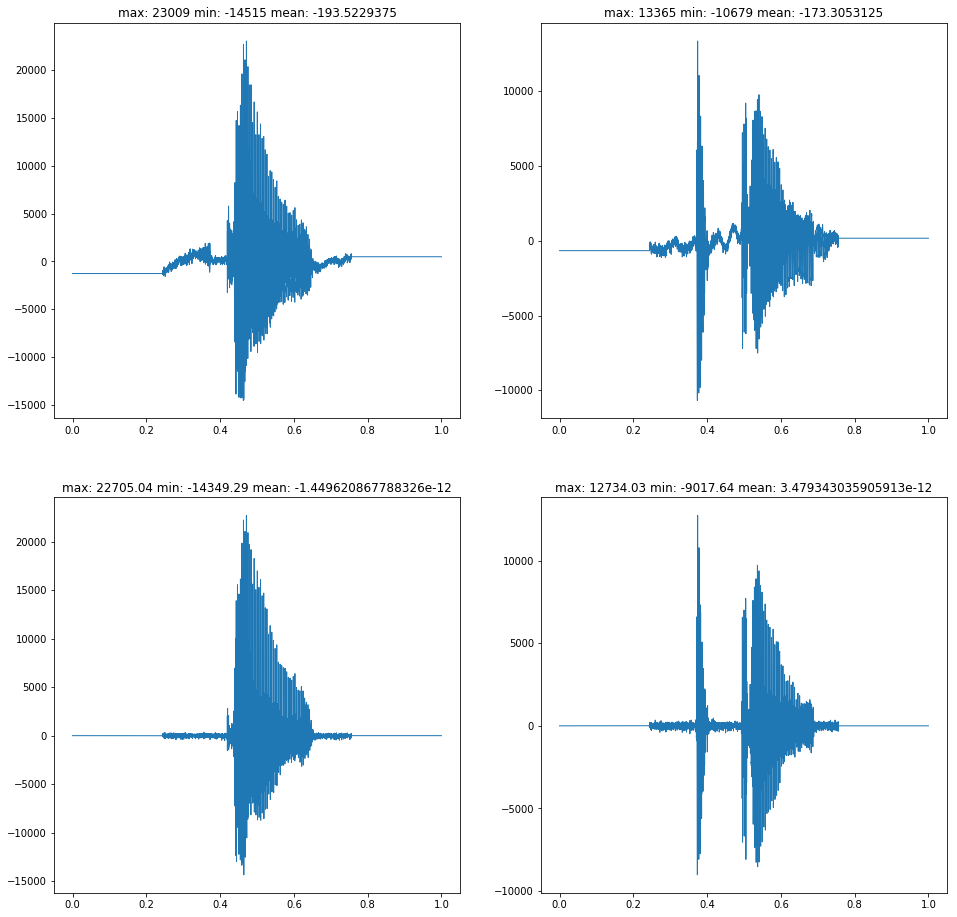

In [72]:
plot_s(data1_list, data2_list, fr = 16000)

In [74]:
fr = 16000
for data in data1_list + data2_list:
    s_ = ipd.Audio(data, rate = fr, autoplay=True)
    ipd.display(s_)
    time.sleep(2)
    ipd.clear_output()

#
s_time = time.time()
data = add_silence(rec1)
e_time = time.time()
print('Time to add Silence: ', (e_time - s_time)* 1000)
print(type(data[0]), len(data), type(rec1[0]), len(rec1))
data_bl, data_bf = get_filters(data)
#data, data_bl, data_bf = add_silence(data), add_silence(data_bl), add_silence(data_bf)

In [224]:
#print(np.array(data).shape, np.array(data_bl).shape, np.array(data_bf).shape)

(16000,) (16000,) (16000,)


#
data_list = [data, data_bl, data_bf]
new_data_list = []
for d_ in data_list:
    #data_ = np.array(d_, dtype = type(data[0]))
    print(data_.shape)
    data_ = data_[np.logical_or(data_ > 300 , data_ < -300)]
    print(data_.shape)
    new_data_list.append(data_)
    

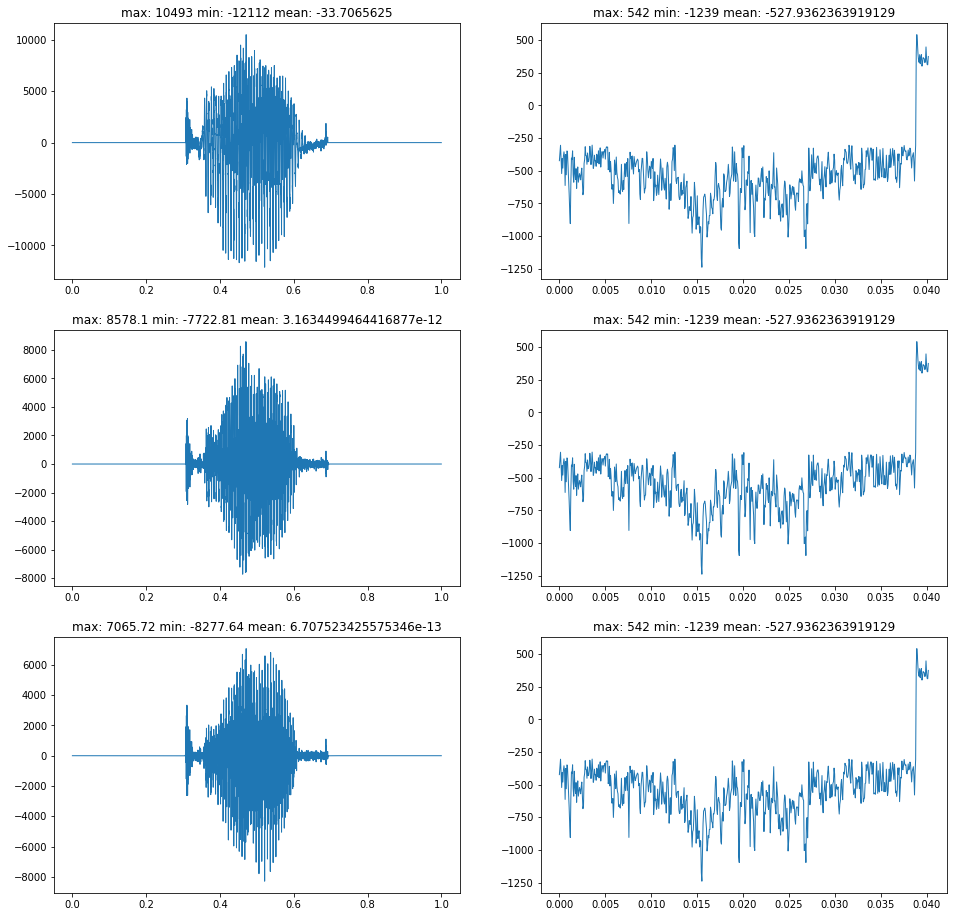

In [227]:
for data in data_list:
    s_ = ipd.Audio(data, rate = fr, autoplay=True)
    ipd.display(s_)
    time.sleep(2)
    ipd.clear_output()

In [157]:
def add_silence(d_for_silence, d_len = 16000):
      
    if (d_len - len(d_for_silence)) > 0:
        
        pad = ((d_len - d_for_silence.shape[0])//2 ) + 1
        pad_list = [0 for i in xrange(pad)]
        r = array('h', pad_list)
        r.extend(sound_data)
        r.extend(pad_list)
    else:
        r = d_for_silence
    return np.array(r, dtype = type(d_for_silence[0]))[:d_len]

In [1]:
import wave, struct

In [2]:
fname = './start.wav'

In [24]:
f = wave.open(fname, 'r')
#f.readframes(nframes=)

In [30]:
d = wave.readwav(f)

AttributeError: module 'wave' has no attribute 'readwav'

In [25]:
length = f.getnframes()
print('length is : ', length)

length is :  17616


In [26]:
import time
from array import array

In [28]:
f = wave.open(fname, 'r')
s_time = time.time()
f = wave.open(fname, 'r')
length = f.getnframes()
print('length is : ', length)
unpacked_data = []
u_data = array('h')
for i in range(0, length, 512):
    
    
    #for x in s:
     #   print(x)
    #break
    #print(i, type(s), len(s))
    x = f.readframes(512)
    u_data.extend(x)
    print(i, len(x), len(u_data))
    #print(x)
    #break
    #wdata = struct.unpack('<h', x)
    #unpacked_data.append(wdata)
#unpacked_data = np.array(unpacked_data, dtype = type(unpacked_data[0]))

e_time = time.time()
print((e_time - s_time)*1000)
    #print(len(wdata))
    #print(i, type(s), len(s), type(wdata[0]), wdata[0])
    #print(wdata[0])
    #print()
    #wdata = struct.unpack('<h8', f.readframes(i))
    #print(i, type(wdata), wdata)

length is :  17616
0 1024 1024
512 1024 2048
1024 1024 3072
1536 1024 4096
2048 1024 5120
2560 1024 6144
3072 1024 7168
3584 1024 8192
4096 1024 9216
4608 1024 10240
5120 1024 11264
5632 1024 12288
6144 1024 13312
6656 1024 14336
7168 1024 15360
7680 1024 16384
8192 1024 17408
8704 1024 18432
9216 1024 19456
9728 1024 20480
10240 1024 21504
10752 1024 22528
11264 1024 23552
11776 1024 24576
12288 1024 25600
12800 1024 26624
13312 1024 27648
13824 1024 28672
14336 1024 29696
14848 1024 30720
15360 1024 31744
15872 1024 32768
16384 1024 33792
16896 1024 34816
17408 416 35232
4.071712493896484


In [519]:
unpacked_data.shape

(17616, 1)

Text(0.5, 1.0, 'max: 25368 min: -21736 mean: 8.830495004541326')

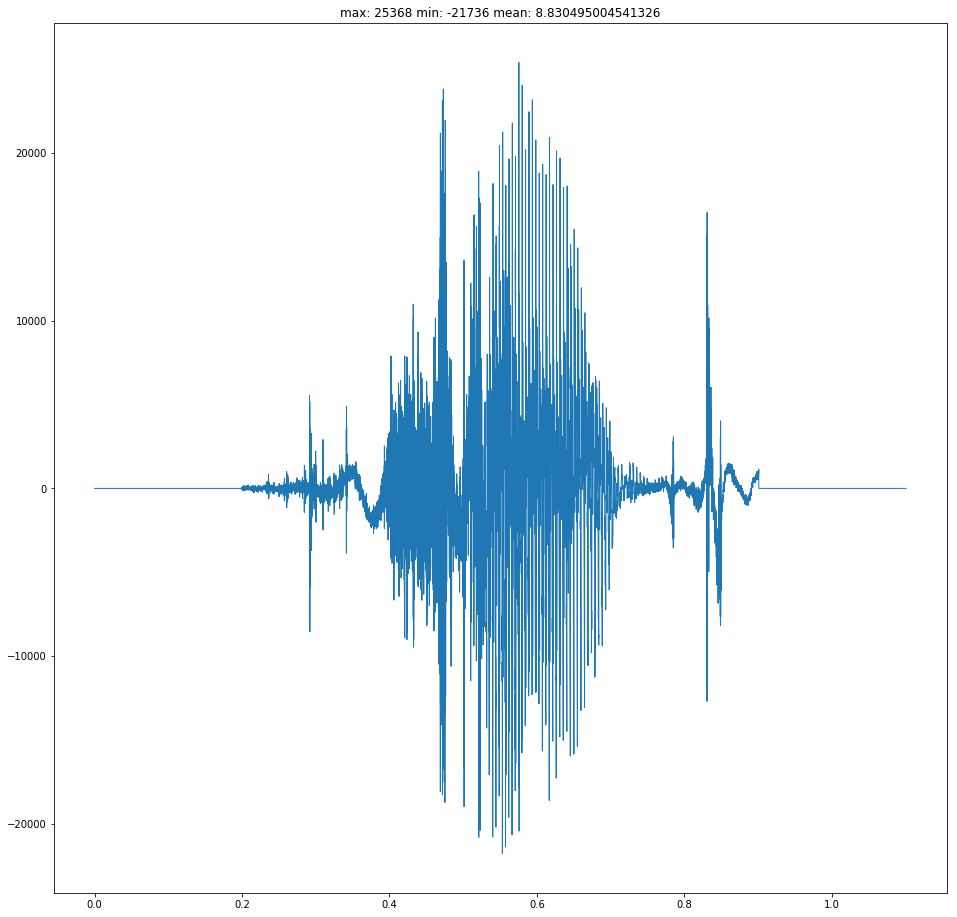

In [521]:
d = unpacked_data
fig, ax = plt.subplots(1, 1,  figsize = (16, 16))
t = np.linspace(0., d.shape[0]/fr, d.shape[0])
title = 'max: '+ str(np.round(d.max(), 2))+ ' min: ' +str(np.round(d.min(), 2)) + ' mean: '+ str(d.mean())
ax.plot(t, d, lw = 1)
ax.set_title(label = title)

In [523]:
d.shape

(17616, 1)

In [524]:
s_ = ipd.Audio(d[:, 0], rate=16000, autoplay=True)
ipd.display(s_)